In [161]:
import os
from os import listdir
from os.path import isfile, join
import cv2
import numpy as np
import os
from PIL import Image, ImageOps
# Import the matplotlib libraries
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as im
import numpy as np
from PIL import Image
import urllib3
from skimage import io
import keras
import pickle
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [8]:
vision = keras.models.load_model("pickles/vision-model.h5")

In [197]:
my_labels = ['carabiners',
 'pulleys',
 'gloves',
 'gloves',
 'gloves',
 'tents',
 'axes',
 'helmets',
 'rope',
 'tents',
 'carabiners',
 'insulated_jackets']

In [2]:
def pad_and_resize(image, desired_size, saveImg = False):
    im = image
    old_size = im.shape[:2] # old_size is in (height, width) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(im, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [255, 255, 255]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    if saveImg is not False:
        cv2.imwrite(im_pth, new_im)
    return new_im

def linear_norm(arr):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    return arr

def normalize(image, convertNeed=False, filepathGiven=False, rawImage=True):
    #subdir = filename.split("/")[-2]
    #name = filename.split("/")[-1]
    if convertNeed is not False:
        if filepathGiven is not False:
            subdir = image.split("/")[-2]
            name = image.split("/")[-1]
            img = Image.open(image).convert('RGB')
            arr = np.array(img)
            new_img = Image.fromarray(linear_norm(arr).astype('uint8'),'RGB')   
        else:
            img = Image.open(image).convert('RGB')
    else:
        new_img = linear_norm(image).astype('uint8')
    if filepathGiven is not False:
        if not os.path.exists(normalized_images_dir + subdir):
            os.makedirs(normalized_images_dir + subdir)
        new_img.save(normalized_images_dir + subdir + '/' + name)
    if rawImage is True:
        return new_img

In [145]:
# retrieve image from url of image
sample_response = {
    "img_url":"http://www.bernunlimited.com/site/images/BM10MMRYT02_BM10MMRYT02.jpg"
}
sample_response1 = {
    "img_url":"https://images-na.ssl-images-amazon.com/images/I/61e5dNBeyfL._SL1263_.jpg"
}

In [146]:
#http = urllib3.PoolManager()
#r = http.request("GET", sample_response["img_url"])
image = io.imread(sample_response1["img_url"])

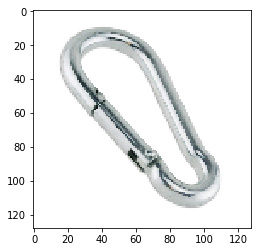

In [153]:
resized_img = pad_and_resize(image, 128)
imshow(resized_img)

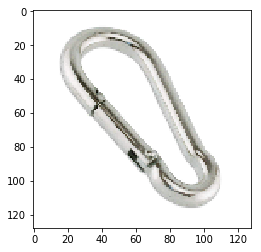

In [154]:
resized_converted_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
imshow(resized_converted_img)

(1, 128, 128, 3)


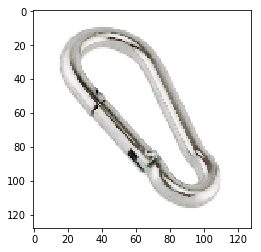

In [158]:
r_c_normalized_img = normalize(resized_converted_img)/255
#final_image = np.insert(r_c_normalized_img, 0, None, axis=0)
#final_image.shape
final_image = np.expand_dims(r_c_normalized_img, axis=0)
imshow(r_c_normalized_img)
print(final_image.shape)

In [205]:
prediction = vision.predict(final_image)


In [ ]:
what_is_it = my_labels[np.argmax(prediction, axis=1)[0]]

In [160]:
hh = np.argmax(prediction, axis=1)
print(prediction)
print(len(prediction[0]))
print(hh)
"""
print(hh.shape)
print(hh[0])
print(e[hh[0]])
print(e[0:12])
"""

[[7.1526283e-01 5.7118706e-04 1.5014279e-01 5.6153882e-02 5.0257113e-02
  5.1050534e-04 1.9455423e-03 3.8981361e-03 1.1451436e-03 1.7010217e-03
  1.2995503e-02 5.4162960e-03]]
12
[0]


'\nprint(hh.shape)\nprint(hh[0])\nprint(e[hh[0]])\nprint(e[0:12])\n'

In [35]:
with open("pickles/y_train.pkl", "rb") as input_file:
    e = pickle.load(input_file)
#labels = pickle.load("pickles/labels.pkl")

In [105]:
with open("pickles/x_test.pkl", "rb") as input_file:
    f = pickle.load(input_file)

In [55]:
set(e)

{'axes',
 'boots',
 'carabiners',
 'crampons',
 'gloves',
 'hardshell_jackets',
 'harnesses',
 'helmets',
 'insulated_jackets',
 'pulleys',
 'rope',
 'tents'}

In [163]:
def OneHotCoder(val_arr):
    data = val_arr
    values = array(data)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded
l = OneHotCoder(e)

In [178]:
np.argmax(l[1])

9

In [177]:
e[1]

'pulleys'

In [181]:
labels = []
for idx, item in enumerate(l):
    dimArr = []
    idx = np.argmax(l[idx])
    val = e[idx]
    dimArr.append(idx)
    dimArr.append(val)
    labels.append(dimArr)
    
    

In [183]:
labels[0:20]

[[2, 'gloves'],
 [9, 'tents'],
 [4, 'gloves'],
 [4, 'gloves'],
 [4, 'gloves'],
 [11, 'insulated_jackets'],
 [0, 'carabiners'],
 [7, 'helmets'],
 [10, 'carabiners'],
 [11, 'insulated_jackets'],
 [2, 'gloves'],
 [8, 'rope'],
 [5, 'tents'],
 [5, 'tents'],
 [0, 'carabiners'],
 [8, 'rope'],
 [5, 'tents'],
 [5, 'tents'],
 [11, 'insulated_jackets'],
 [7, 'helmets']]

In [186]:
final_labels = []
for item in labels:
    if (item not in final_labels):
        final_labels.append(item)
    else:
        pass

In [187]:
final_labels

[[2, 'gloves'],
 [9, 'tents'],
 [4, 'gloves'],
 [11, 'insulated_jackets'],
 [0, 'carabiners'],
 [7, 'helmets'],
 [10, 'carabiners'],
 [8, 'rope'],
 [5, 'tents'],
 [3, 'gloves'],
 [6, 'axes'],
 [1, 'pulleys']]

In [191]:
newList = [None] * len(final_labels)

In [193]:
for label in final_labels:
    newList[label[0]] = label[1]

In [ ]:
def FindMyLabels()